In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#from behav import plotting, utils, loading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
pd.set_option('display.max_columns', 500)
import seaborn as sns

In [3]:
from matplotlib import rcParams
#rcParams['font.family'] = 'Arial'

In [4]:
from cdcp.experiment_info import subjects
from cdcp.paths import DATA_PATH_MAGPI
from cdcp.behavior.data import prepare_behavior_data
from cdcp.visualization.colors import colors
subjects, DATA_PATH_MAGPI
from cdcp.paths import DATA_PATH_MAGPI, FIGURE_DIR, ensure_dir
from cdcp.general import save_fig

/n/groups/datta/tim_sainburg/projects/CDCP_paper/cdcp/general.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [5]:
from cdcp.paths import DATA_PATH_MAGPI, FIGURE_DIR, ensure_dir
from cdcp.general import save_fig

In [6]:
from cdcp.paths import DATA_DIR, ensure_dir

In [7]:
from cdcp.visualization.colors import colors as cdcp_colors

In [8]:
save_figs = True

In [9]:
from cdcp.behavior.data import bin_data, cue_direction

### load data

In [10]:
def prepare_behavior_data(data, num_bins=16, num_prev=np.inf):
    """ parses information from raw bahav_data dataframes
    """
    # subset normal trials
    data = data[data["response"] != "none"]
    data = data[data["type_"] == "normal"]
    
    # Subset part of the dataset
    if num_prev != np.inf:
        data = data[-num_prev:]
    
        
    # Extract the response as a boolean
    data["response_bool"] = 0
    data.loc[data["response"] == "L", "response_bool"] = 1
    
    # flip interpolation 0-127 so 0 corresponds to left, and 127 corresponds to right (to make it easier to read)
    #data['interpolation_point'] = 127 - data['interpolation_point']
    data['response_bool'] = 1 - data['response_bool'] 

    # specify interpolation info
    data["interpolation"] = [
        ls + rs for ls, rs in zip(data.left_stim.values, data.right_stim.values)
    ]

    # bin data into 32 equally sized bins
    data["pos_bin"], bins = bin_data(
        data["interpolation_point"].values.astype("float32"), num_bins
    )
    data["cue_direction"] = data.cue_id.apply(cue_direction)
    return data, bins

In [11]:
behav_data = {}
for bird in tqdm(subjects):
    behav_data[bird], _ = prepare_behavior_data(
        pd.read_pickle(
            DATA_DIR / "behavior" / "subject_behavior_dfs" / f"{bird}.pickle.zip",
            compression="zip",
        )
    )

    print(bird, len(behav_data[bird]))

  5%|▌         | 1/20 [00:02<00:45,  2.37s/it]

B1174 358106


 10%|█         | 2/20 [00:04<00:44,  2.46s/it]

B1426 394956


 15%|█▌        | 3/20 [00:08<00:54,  3.20s/it]

B1170 520304


 20%|██        | 4/20 [00:14<01:08,  4.29s/it]

B1432 769387


 25%|██▌       | 5/20 [00:15<00:44,  2.94s/it]

B1437 87702


 30%|███       | 6/20 [00:16<00:33,  2.36s/it]

B1433 173287


 35%|███▌      | 7/20 [00:17<00:25,  1.95s/it]

B1597 209867


 40%|████      | 8/20 [00:20<00:25,  2.12s/it]

B1427 396727


 45%|████▌     | 9/20 [00:20<00:17,  1.60s/it]

B1188 74724


 50%|█████     | 10/20 [00:22<00:15,  1.54s/it]

B1244 235092


 55%|█████▌    | 11/20 [00:22<00:11,  1.32s/it]

B1590 170889


 60%|██████    | 12/20 [00:23<00:09,  1.15s/it]

B1399 114908


 65%|██████▌   | 13/20 [00:24<00:07,  1.04s/it]

B1591 142534


 70%|███████   | 14/20 [00:25<00:06,  1.11s/it]

B1252 205007


 75%|███████▌  | 15/20 [00:26<00:05,  1.02s/it]

B1110 112785


 80%|████████  | 16/20 [00:27<00:03,  1.06it/s]

B1390 130094


 85%|████████▌ | 17/20 [00:28<00:02,  1.00it/s]

B1248 177069


 90%|█████████ | 18/20 [00:30<00:02,  1.34s/it]

B1593 336716


 95%|█████████▌| 19/20 [00:31<00:01,  1.08s/it]

B1595 98607


100%|██████████| 20/20 [00:32<00:00,  1.60s/it]

B1276 170278


In [12]:
behav_data[bird]

,session,index,type_,stimulus,class_,response,correct,rt,reward,punish,cue_class,cue_id,cue_prob,num_stims,flip_cues,binary_choice,cueing,left_stim,right_stim,interpolation_point,prob_cue,prob_cued_no_cue,data_file,response_bool,interpolation,pos_bin,cue_direction
time,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-25 13:25:35.184647,1.0,4.0,normal,/home/bird/opdat/cdp_stimuli/AE/NC/NC_AE_000.wav,R,R,True,4.600892,True,False,NC,NC,0.500,1.0,False,True,False,A,E,127.0,0.0,0.2,/mnt/cube/RawData/Magpi/B1276/B1276_trialdata_...,1,AE,15,N
2020-12-25 13:25:46.526909,1.0,5.0,normal,/home/bird/opdat/cdp_stimuli/AE/NC/NC_AE_000.wav,R,R,True,2.263061,True,False,NC,NC,0.500,1.0,False,True,False,A,E,127.0,0.0,0.2,/mnt/cube/RawData/Magpi/B1276/B1276_trialdata_...,1,AE,15,N
2020-12-25 13:26:02.515328,1.0,6.0,normal,/home/bird/opdat/cdp_stimuli/AE/NC/NC_AE_000.wav,R,L,False,3.730072,False,True,NC,NC,0.500,1.0,False,True,False,A,E,127.0,0.0,0.2,/mnt/cube/RawData/Magpi/B1276/B1276_trialdata_...,0,AE,15,N
2020-12-25 13:29:26.012997,1.0,15.0,normal,/home/bird/opdat/cdp_stimuli/AE/NC/NC_AE_000.wav,R,R,True,1.171103,True,False,NC,NC,0.500,1.0,False,True,False,A,E,127.0,0.0,0.2,/mnt/cube/RawData/Magpi/B1276/B1276_trialdata_...,1,AE,15,N
2020-12-25 13:29:34.794091,1.0,16.0,normal,/home/bird/opdat/cdp_stimuli/AE/NC/NC_AE_127.wav,L,L,True,2.637276,True,False,NC,NC,0.500,1.0,False,True,False,A,E,0.0,0.0,0.2,/mnt/cube/RawData/Magpi/B1276/B1276_trialdata_...,0,AE,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-06 15:03:55.624285,23.0,70.0,normal,/home/bird/opdat/cdp_stimuli/BF/CR1/CR1_BF_011...,R,R,True,0.580084,True,False,CR,CR1,0.875,3.0,False,False,True,B,F,116.0,0.8,0.2,/mnt/cube/RawData/Magpi/B1276/B1276_trialdata_...,1,BF,14,R
2021-04-06 15:04:08.221567,23.0,71.0,normal,/home/bird/opdat/cdp_stimuli/CF/CL1/CL1_CF_089...,L,L,True,0.220263,False,False,CL,CL1,0.875,3.0,False,False,True,C,F,38.0,0.8,0.2,/mnt/cube/RawData/Magpi/B1276/B1276_trialdata_...,0,CF,5,L
2021-04-06 15:04:20.534835,23.0,72.0,normal,/home/bird/opdat/cdp_stimuli/BE/CR1/CR1_BE_051...,R,R,True,1.595784,True,False,CR,CR1,0.875,3.0,False,False,True,B,E,76.0,0.8,0.2,/mnt/cube/RawData/Magpi/B1276/B1276_trialdata_...,1,BE,9,R


In [13]:
fit_df_interp = pd.read_pickle(DATA_DIR/'behavior'/'fit_df_interp.pickle')

In [14]:
fit_df_interp[:3]

,bird,cue,interp,n_points,_min,_max,_inflection,_slope,model,y_interp,r_squared
0,B1174,NC,AE,14538,0.112693,0.903653,64.036638,14.918588,<lmfit.minimizer.MinimizerResult object at 0x7...,"[0.11269340812421869, 0.11269340812421869, 0.1...",0.538664
1,B1174,CL0,AE,6876,0.099140,0.880312,64.357732,27.363792,<lmfit.minimizer.MinimizerResult object at 0x7...,"[0.09913953431260725, 0.09913953431260725, 0.0...",0.533202
2,B1174,CN,AE,1606,0.131581,0.884359,64.226503,24.816837,<lmfit.minimizer.MinimizerResult object at 0x7...,"[0.1315810264285665, 0.1315810264285665, 0.131...",0.519944


In [15]:
fit_df_interp.bird.unique()

array(['B1174', 'B1426', 'B1170', 'B1432', 'B1437', 'B1433', 'B1597',
       'B1427', 'B1188', 'B1244', 'B1590', 'B1399', 'B1591', 'B1252',
       'B1110', 'B1390', 'B1248', 'B1593', 'B1595', 'B1276'], dtype=object)

### Plot broken out by birds x interpolations

In [16]:
from cdcp.behavior.data import sum_data
from cdcp.behavior.visualize_behavior import plot_summary_data

In [17]:
interp_range = np.arange(128)

  0%|          | 0/20 [00:00<?, ?it/s]/n/groups/datta/tim_sainburg/projects/CDCP_paper/cdcp/behavior/data.py:21: FutureWarning: ['type_', 'stimulus', 'class_', 'response', 'cue_class', 'data_file', 'interpolation'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  stats_df = data.groupby(groups).agg([np.mean, np.std, len])
  5%|▌         | 1/20 [00:02<00:49,  2.59s/it]/n/groups/datta/tim_sainburg/projects/CDCP_paper/cdcp/behavior/data.py:21: FutureWarning: ['type_', 'stimulus', 'class_', 'response', 'cue_class', 'data_file', 'interpolation'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  stats_df = data.groupby(groups).agg([np.mean, np.std, len])
 10%|█         | 2/20 [00:05<00:47,  2.61s/it]/n/groups/datta/tim_sainburg/projects/CDCP_paper/cdcp/behavior/data.py:21: FutureWarning: ['type

 95%|█████████▌| 19/20 [00:36<00:01,  1.70s/it]/n/groups/datta/tim_sainburg/projects/CDCP_paper/cdcp/behavior/data.py:21: FutureWarning: ['type_', 'stimulus', 'class_', 'response', 'cue_class', 'data_file', 'interpolation'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  stats_df = data.groupby(groups).agg([np.mean, np.std, len])
100%|██████████| 20/20 [00:37<00:00,  1.88s/it]


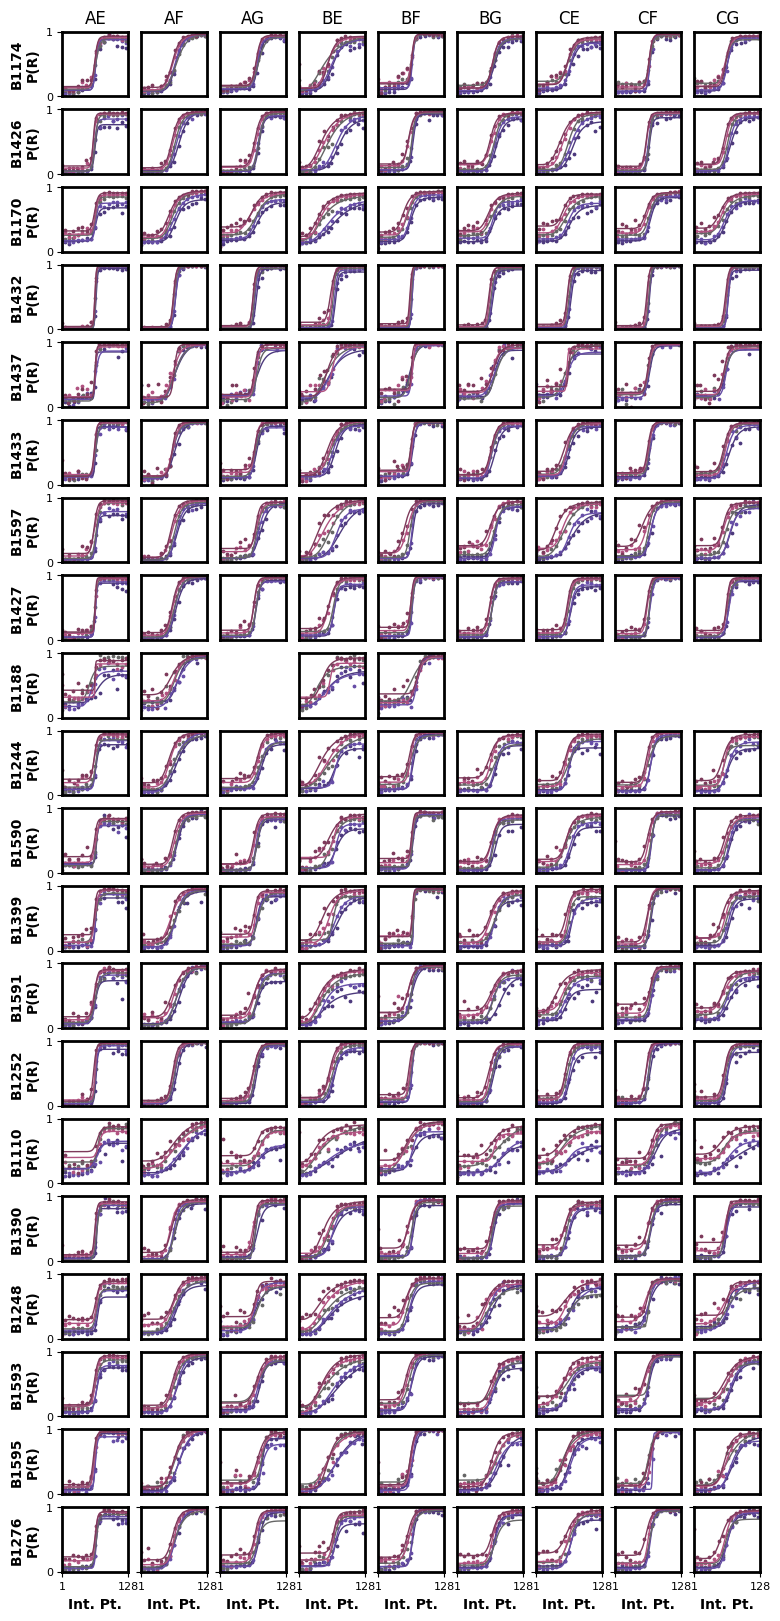

In [18]:
birds_to_plot = subjects 
#birds_to_plot = ["B1432",  "B1437"]
bird_colors = {
    i: j for i, j in zip(birds_to_plot, sns.color_palette("Dark2", len(birds_to_plot)))
}

left_stims = ['A', 'B', 'C']
right_stims = ['E', 'F', 'G']

ncols = len(left_stims) * len(right_stims)
nrows = len(birds_to_plot)


fig, axs = plt.subplots(nrows = nrows, ncols = ncols,  figsize=(ncols, nrows))

#color = "k"
lw = 1
#cue_id = "NC"
alpha = 1


summary_groups = [
    "cue_id",
    "cue_direction",
    "cueing",
    "pos_bin",
    "left_stim",
    "right_stim",
]

summary_data_stims = {}
for bi, bird in enumerate(tqdm(birds_to_plot)):
    
    ax = axs[bi]
    behav_data[bird]["interpolation_point"] = behav_data[bird][
        "interpolation_point"
    ].values.astype("int")

    summary_data_stims[bird] = sum_data(behav_data[bird], groups=summary_groups)
    #left_stims = np.unique(summary_data_stims[bird].left_stim)
    #right_stims = np.unique(summary_data_stims[bird].right_stim)

    color = bird_colors[bird]
    color = 'k'

    for lsi, left_stim in enumerate(left_stims):
        for rsi, right_stim in enumerate(right_stims):
            
            coli = 3 * lsi + rsi
            ax = axs[bi, coli]
            for cue_id in ["CL1", "CL0", "NC", "CR0", "CR1"]:
                color = cdcp_colors["cue_pal"][cue_id]
                stim_df = summary_data_stims[bird][
                    (summary_data_stims[bird].left_stim == left_stim)
                    & (summary_data_stims[bird].right_stim == right_stim)
                ]
                
                
                if len(stim_df) == 0:
                    ax.axis('off')
                    continue
                stim_summary = stim_df[
                    (stim_df.cue_id == cue_id) & (stim_df.cueing == True)
                ]

                bin_mean = stim_summary.interpolation_point["mean"].values
                response_mean = stim_summary.response_bool["mean"].values
                response_std = stim_summary.response_bool["std"].values
                response_n = stim_summary.response_bool["len"].values
                response_sem = response_std / np.sqrt(response_n)

                if True:
                    ax.scatter(
                        bin_mean, response_mean, color=color, s=3, alpha=alpha,
                    )
                    if False:
                        ax.errorbar(
                            bin_mean,
                            response_mean,
                            yerr=response_sem,
                            xerr=None,
                            color=color,
                            lw=2,
                            alpha=alpha,
                            fmt="none",
                        )

                cue_row = fit_df_interp[
                    (fit_df_interp.bird == bird)
                    & (fit_df_interp.cue == cue_id)
                    & (fit_df_interp.interp == (left_stim + right_stim))
                ].iloc[0]

                ax.plot(
                    interp_range,
                    cue_row.y_interp,
                    label=cue_id,
                    lw=lw,
                    color=color,
                    alpha=alpha,
                )
                ax.set_xticks([])
                ax.set_ylim([0, 1])
                ax.set_yticks([0, 1])
                [i.set_linewidth(2) for i in ax.spines.values()]
                ax.xaxis.set_tick_params(labelsize=12)
                ax.yaxis.set_tick_params(labelsize=12)

                ax.set_ylim([0, 1])
                ax.set_xlim([0, 127])

                if coli == 0:
                        ax.set_ylabel(f"{bird}\nP(R)", fontsize=10, fontweight="bold")
                else:
                    ax.set_yticks([])
                    ax.set_yticklabels([])

                if bi == 0:
                    ax.set_title(f"{left_stim}{right_stim}")

                if bi == len(birds_to_plot) - 1:
                    ax.set_xlabel("Int. Pt.", fontsize=10, fontweight="bold")
                    ax.set_xticks([0, 127])
                    ax.set_yticks([0, 1])
                    ax.set_xticklabels([1, 128])
                else:
                    ax.set_xticks([])
                    ax.set_xticklabels([])

                ax.xaxis.set_tick_params(labelsize=8)
                ax.yaxis.set_tick_params(labelsize=8)

ensure_dir(FIGURE_DIR / 'behavior')
if save_figs:
    save_fig(FIGURE_DIR / 'behavior' / 'all_psychometric', save_pdf=True)
plt.show()


### Plot broken out by birds

In [19]:
fit_df_interp

,bird,cue,interp,n_points,_min,_max,_inflection,_slope,model,y_interp,r_squared
0,B1174,NC,AE,14538,0.112693,0.903653,64.036638,14.918588,<lmfit.minimizer.MinimizerResult object at 0x7...,"[0.11269340812421869, 0.11269340812421869, 0.1...",0.538664
1,B1174,CL0,AE,6876,0.099140,0.880312,64.357732,27.363792,<lmfit.minimizer.MinimizerResult object at 0x7...,"[0.09913953431260725, 0.09913953431260725, 0.0...",0.533202
2,B1174,CN,AE,1606,0.131581,0.884359,64.226503,24.816837,<lmfit.minimizer.MinimizerResult object at 0x7...,"[0.1315810264285665, 0.1315810264285665, 0.131...",0.519944
3,B1174,CR1,AE,6927,0.151963,0.929919,62.273213,21.506086,<lmfit.minimizer.MinimizerResult object at 0x7...,"[0.15196265702273937, 0.15196265702273937, 0.1...",0.489598
4,B1174,CL1,AE,6792,0.094312,0.877983,63.954374,26.650965,<lmfit.minimizer.MinimizerResult object at 0x7...,"[0.0943123791228907, 0.0943123791228907, 0.094...",0.483162
...,...,...,...,...,...,...,...,...,...,...,...
1045,B1276,CN,CE,882,0.196168,0.832503,69.055734,11.122790,<lmfit.minimizer.MinimizerResult object at 0x7...,"[0.1961680399865704, 0.1961680399865704, 0.196...",0.312722
1046,B1276,CR1,CE,3423,0.289758,0.955465,60.255309,6.329472,<lmfit.minimizer.MinimizerResult object at 0x7...,"[0.2897584453411961, 0.28975844534480055, 0.28...",0.243333
1047,B1276,CL1,CE,3290,0.089184,0.797230,66.674598,11.416845,<lmfit.minimizer.MinimizerResult object at 0x7...,"[0.08918391594935793, 0.08918391594935793, 0.0...",0.293642
1048,B1276,CR0,CE,3339,0.157694,0.911454,62.749114,8.954806,<lmfit.minimizer.MinimizerResult object at 0x7...,"[0.15769352750451016, 0.15769352750451016, 0.1...",0.392596


### Fit 4 param logistic for individual birds

In [20]:
from cdcp.behavior.psychometric import FourParameterLogistic, fit_FourParameterLogistic

In [21]:
nex = 100000
fit_df = pd.DataFrame(
    columns=[
        "bird",
        "cue",
        "n_points",
        "_min",
        "_max",
        "_inflection",
        "_slope",
        "model",
        "y_interp",
        "r_squared",
    ]
)

for bird in tqdm(subjects):
    # subset data
    behav_data_subject = behav_data[bird]
    if len(behav_data_subject) < nex:
        behav_data_subject = behav_data_subject[20000:]
    behav_data_subject = behav_data_subject[-nex:]
    for cue_id in behav_data_subject.cue_id.unique():
        if cue_id == "N":
            continue
        
        
        
        cue_df = behav_data_subject[behav_data_subject.cue_id == cue_id]
        interp_points = cue_df.interpolation_point.values.astype("float32")
        response_points = cue_df.response_bool.values.astype("float32")
        # fit model
        (
            (_min, _max, _inflection, _slope),
            results_logistic,
            y_model,
            r_squared,
        ) = fit_FourParameterLogistic(interp_points, response_points)
        # model fit
        y_interp = FourParameterLogistic(
            {"_min": _min, "_max": _max, "inflection": _inflection, "slope": _slope},
            interp_range,
        )

        fit_df.loc[len(fit_df)] = [
            bird,
            cue_id,
            len(cue_df),
            _min,
            _max,
            _inflection,
            _slope,
            results_logistic,
            y_interp,
            r_squared,
        ]

100%|██████████| 20/20 [01:38<00:00,  4.90s/it]


In [22]:
np.arange(20) % 4 == 0

array([ True, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False])

In [23]:
interp_range

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127])

  0%|          | 0/20 [00:00<?, ?it/s]/n/groups/datta/tim_sainburg/projects/CDCP_paper/cdcp/behavior/data.py:21: FutureWarning: ['type_', 'stimulus', 'class_', 'response', 'cue_class', 'left_stim', 'right_stim', 'data_file', 'interpolation'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  stats_df = data.groupby(groups).agg([np.mean, np.std, len])
  5%|▌         | 1/20 [00:00<00:17,  1.08it/s]/n/groups/datta/tim_sainburg/projects/CDCP_paper/cdcp/behavior/data.py:21: FutureWarning: ['type_', 'stimulus', 'class_', 'response', 'cue_class', 'left_stim', 'right_stim', 'data_file', 'interpolation'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  stats_df = data.groupby(groups).agg([np.mean, np.std, len])
 10%|█         | 2/20 [00:01<00:17,  1.03it/s]/n/groups/datta/tim_sainburg/projects/CDCP

 90%|█████████ | 18/20 [00:12<00:01,  1.71it/s]/n/groups/datta/tim_sainburg/projects/CDCP_paper/cdcp/behavior/data.py:21: FutureWarning: ['type_', 'stimulus', 'class_', 'response', 'cue_class', 'left_stim', 'right_stim', 'data_file', 'interpolation'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  stats_df = data.groupby(groups).agg([np.mean, np.std, len])
 95%|█████████▌| 19/20 [00:12<00:00,  1.95it/s]/n/groups/datta/tim_sainburg/projects/CDCP_paper/cdcp/behavior/data.py:21: FutureWarning: ['type_', 'stimulus', 'class_', 'response', 'cue_class', 'left_stim', 'right_stim', 'data_file', 'interpolation'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  stats_df = data.groupby(groups).agg([np.mean, np.std, len])
100%|██████████| 20/20 [00:12<00:00,  1.55it/s]


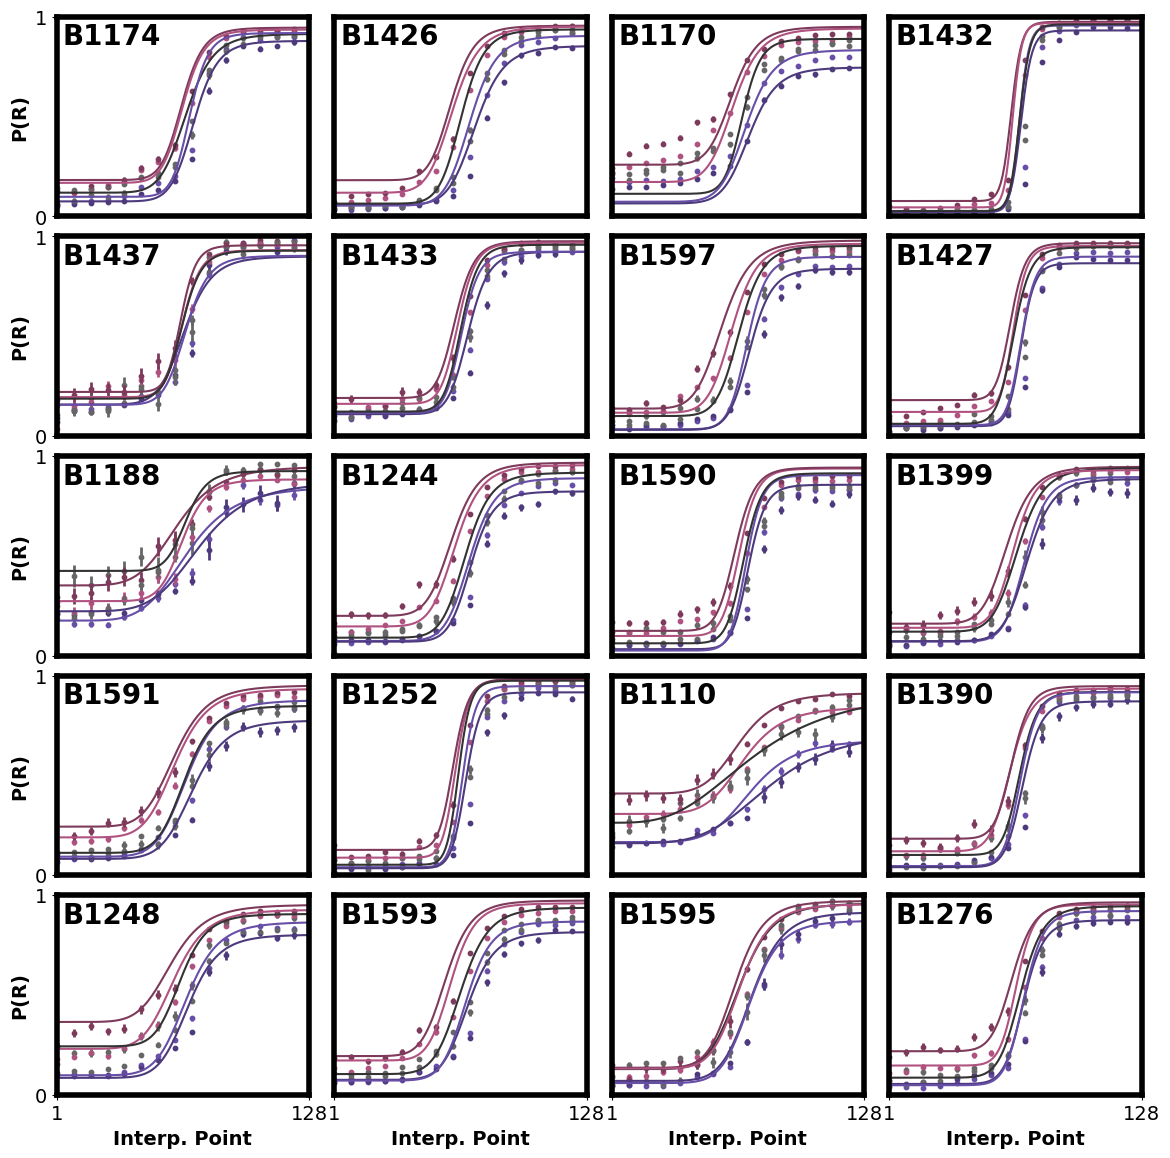

In [24]:
summary_groups = ["cue_id", "cue_direction", "cueing", "pos_bin"]
summary_data = {}
fig, axs = plt.subplots(ncols=4, nrows=5, figsize=(14, 14),gridspec_kw={
        "wspace": 0.1,
        "hspace": 0.1,
    })
for bi, bird in enumerate(tqdm(subjects)):
    summary_data[bird] = sum_data(behav_data[bird], groups=summary_groups)
    ax = axs.flatten()[bi]
    coli = bi // 4
    #if bi % 4 == 0:
    #    ax.set_ylabel('P(PR)', fontsize=22)
    plot_summary_data(
        bird,
        summary_data[bird][-10000:],
        bins=np.linspace(0,128, 16),
        ax=ax,
        lines=False,
        error=True,
        scatter=True,
        title=False,
        legend=False,
        error_size=2
    )
    ax.set_xticks([])
    ax.set_ylim([0, 1])
    ax.set_yticks([])
    [i.set_linewidth(4) for i in ax.spines.values()]
    
    if bi % 4 == 0:
        ax.set_ylabel(f"P(R)", fontsize=14, fontweight="bold")
        ax.set_yticks([0, 1])
        ax.set_yticklabels([0, 1], fontsize=14)
    else:
        ax.set_yticks([])
        ax.set_yticklabels([])

    if bi > 15:
        ax.set_xlabel("Interp. Point", fontsize=14, fontweight="bold")
        ax.set_xticks([0, 127])
        
        ax.set_xticklabels([1, 128], fontsize=14)
    else:
        ax.set_xticks([])
        ax.set_xticklabels([])

    bird_fit_df = fit_df[fit_df.bird == bird]
    for cue_id in bird_fit_df.cue.unique():
        if cue_id == "NC":
            continue
        cue_row = bird_fit_df[bird_fit_df.cue == cue_id].iloc[0]
        ax.plot(interp_range, cue_row.y_interp, label = cue_id, color = cdcp_colors["cue_pal"][cue_id])
    
    ax.text(
        0.025,
        0.90,
        bird,
        horizontalalignment="left",
        verticalalignment="center",
        fontweight="bold",
        fontsize=20,
        transform=ax.transAxes,
    )
    #break
    

if True:
    ensure_dir(FIGURE_DIR / 'behavior')
    if save_figs:
        save_fig(FIGURE_DIR / 'behavior' / 'psychometric_birds', save_pdf=True)
    plt.show()


### break down by interpolation

In [25]:
nex = 100000
fit_df = pd.DataFrame(
    columns=[
        "interpolation",
        "cue",
        "n_points",
        "_min",
        "_max",
        "_inflection",
        "_slope",
        "model",
        "y_interp",
        "r_squared",
    ]
)
for interpolation in tqdm(behav_data[bird].interpolation.unique(), leave=False):
    behav_data_subjects = []
    for bird in tqdm(subjects):
        # subset data
        behav_data_subject = behav_data[bird]
        if len(behav_data_subject) < nex:
            behav_data_subject = behav_data_subject[20000:]
        behav_data_subject = behav_data_subject[-nex:]
        behav_data_subject  = behav_data_subject[behav_data_subject.interpolation == interpolation]
        behav_data_subjects.append(behav_data_subject)

    behav_data_subject = pd.concat(behav_data_subjects)    
    
    for cue_id in behav_data_subject.cue_id.unique():
        if cue_id == "N":
            continue

        cue_df = behav_data_subject[behav_data_subject.cue_id == cue_id]
        interp_points = cue_df.interpolation_point.values.astype("float32")
        response_points = cue_df.response_bool.values.astype("float32")
        # fit model
        (
            (_min, _max, _inflection, _slope),
            results_logistic,
            y_model,
            r_squared,
        ) = fit_FourParameterLogistic(interp_points, response_points)
        # model fit
        y_interp = FourParameterLogistic(
            {"_min": _min, "_max": _max, "inflection": _inflection, "slope": _slope},
            interp_range,
        )

        fit_df.loc[len(fit_df)] = [
            interpolation,
            cue_id,
            len(cue_df),
            _min,
            _max,
            _inflection,
            _slope,
            results_logistic,
            y_interp,
            r_squared,
        ]

100%|██████████| 20/20 [00:00<00:00, 26.75it/s]
/tmp/ipykernel_155972/412589285.py:27: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  behav_data_subject = pd.concat(behav_data_subjects)
100%|██████████| 20/20 [00:00<00:00, 30.35it/s]
/tmp/ipykernel_155972/412589285.py:27: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  behav_data_subject = pd.concat(behav_data_subjects)
100%|██████████| 20/20 [00:00<00:00, 33.96it/s]
/tmp/ipykernel_155972/412589285.py:27: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  behav_data_subject = pd.concat(behav_data_subjects)
100%|██████████| 20/20 [00:00<00:00, 35.82it/s]
/tmp/ipyke

In [27]:
bird_fit_df

,bird,cue,n_points,_min,_max,_inflection,_slope,model,y_interp,r_squared
114,B1276,CL1,19819,0.053844,0.874476,67.550963,13.527291,<lmfit.minimizer.MinimizerResult object at 0x7...,"[0.05384423383803694, 0.05384423383803694, 0.0...",0.452929
115,B1276,CR0,19856,0.146121,0.952698,64.007234,14.786537,<lmfit.minimizer.MinimizerResult object at 0x7...,"[0.14612063238049855, 0.14612063238049855, 0.1...",0.542653
116,B1276,CR1,20389,0.217787,0.963937,62.009094,11.363957,<lmfit.minimizer.MinimizerResult object at 0x7...,"[0.2177870881080911, 0.2177870881080911, 0.217...",0.402496
117,B1276,CL0,19855,0.047526,0.919963,67.761016,13.938492,<lmfit.minimizer.MinimizerResult object at 0x7...,"[0.047525602886324236, 0.047525602886324236, 0...",0.618021
118,B1276,NC,16001,0.067435,0.939313,65.735569,11.590288,<lmfit.minimizer.MinimizerResult object at 0x7...,"[0.06743485994030085, 0.06743485994030085, 0.0...",0.620752
119,B1276,CN,4080,0.085262,0.944396,66.156604,11.697436,<lmfit.minimizer.MinimizerResult object at 0x7...,"[0.08526244907061009, 0.08526244907061009, 0.0...",0.603382


In [28]:
bird_fit_df._min.values

array([0.05384423, 0.14612063, 0.21778709, 0.0475256 , 0.06743486,
       0.08526245])

100%|██████████| 20/20 [00:00<00:00, 11748.75it/s]
/n/groups/datta/tim_sainburg/projects/CDCP_paper/cdcp/behavior/data.py:21: FutureWarning: ['type_', 'stimulus', 'class_', 'response', 'cue_class', 'data_file', 'interpolation'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  stats_df = data.groupby(groups).agg([np.mean, np.std, len])
100%|██████████| 20/20 [00:00<00:00, 19775.12it/s]
/n/groups/datta/tim_sainburg/projects/CDCP_paper/cdcp/behavior/data.py:21: FutureWarning: ['type_', 'stimulus', 'class_', 'response', 'cue_class', 'data_file', 'interpolation'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  stats_df = data.groupby(groups).agg([np.mean, np.std, len])
100%|██████████| 20/20 [00:00<00:00, 21328.78it/s]
/n/groups/datta/tim_sainburg/projects/CDCP_paper/cdcp/behavior/data.py:21

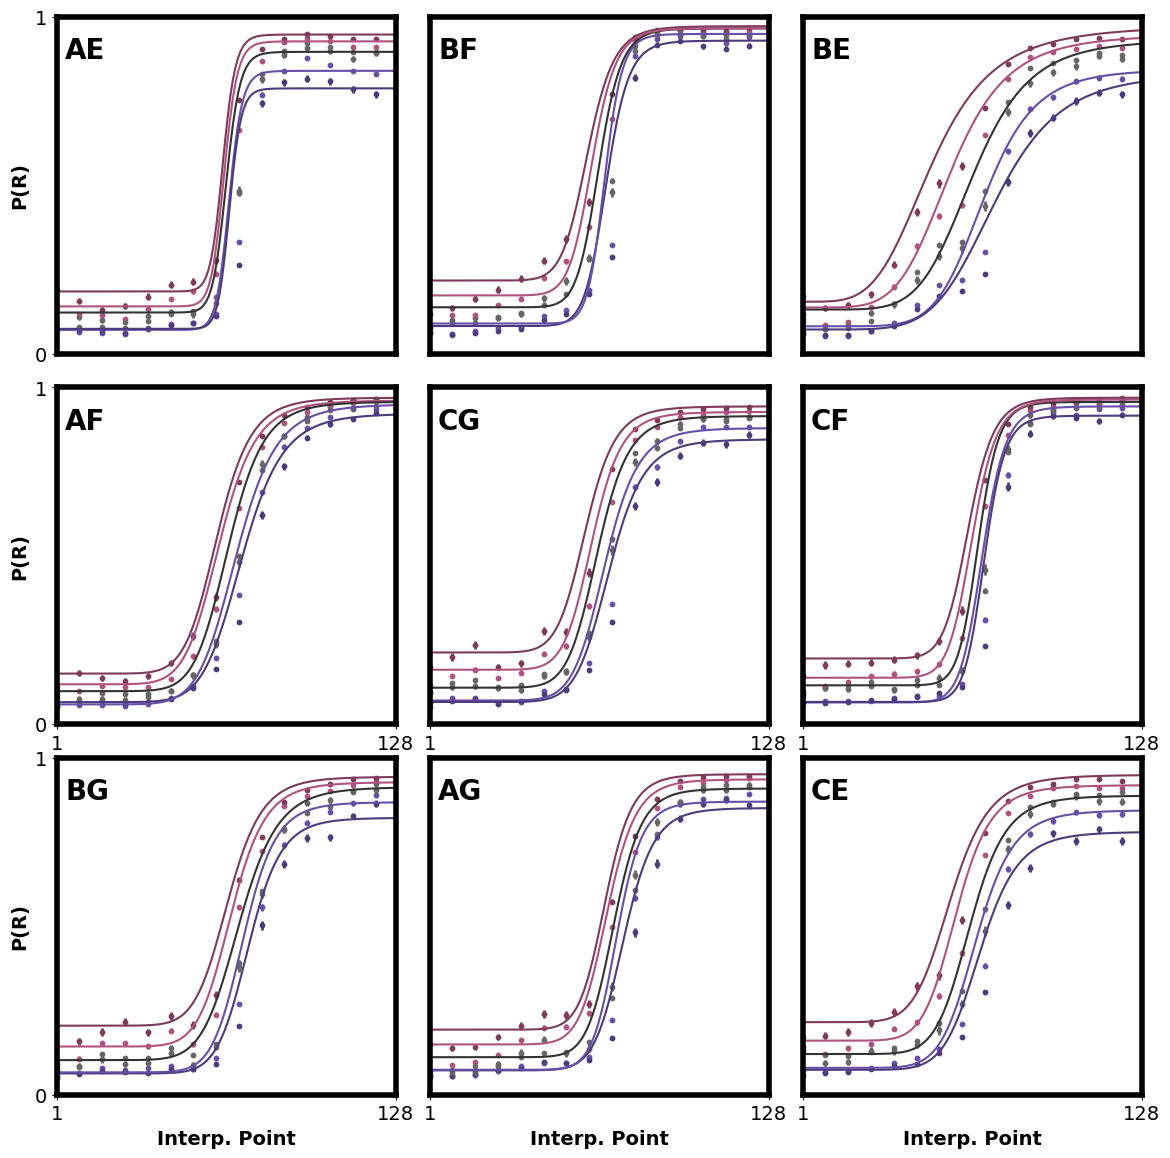

In [29]:
summary_groups = [
    "cue_id",
    "cue_direction",
    "cueing",
    "pos_bin",
    "left_stim",
    "right_stim",
]

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(14, 14),gridspec_kw={
        "wspace": 0.1,
        "hspace": 0.1,
    })
for bi, interp in enumerate(tqdm(fit_df.interpolation.unique())):
    ax = axs.flatten()[bi]
    coli = bi // 3
    #if bi % 4 == 0:
    #    ax.set_ylabel('P(PR)', fontsize=22)
    if True:
        
        bd = pd.concat(behav_data[bird][:-10000] for bird in tqdm(subjects))
        bd = bd[bd.interpolation == interp]
        summary_data = sum_data(bd, groups=summary_groups)
        
        plot_summary_data(
            bird,
            summary_data[-10000:],
            bins=np.linspace(0,128, 16),
            ax=ax,
            lines=False,
            error=True,
            scatter=True,
            title=False,
            legend=False,
            error_size=2
        )
    ax.set_xticks([])
    ax.set_ylim([0, 1])
    ax.set_yticks([])
    [i.set_linewidth(4) for i in ax.spines.values()]
    
    if bi % 3 == 0:
        ax.set_ylabel(f"P(R)", fontsize=14, fontweight="bold")
        ax.set_yticks([0, 1])
        ax.set_yticklabels([0, 1], fontsize=14)
    else:
        ax.set_yticks([])
        ax.set_yticklabels([])

    if bi > 2:
        ax.set_xlabel("Interp. Point", fontsize=14, fontweight="bold")
        ax.set_xticks([0, 127])
        
        ax.set_xticklabels([1, 128], fontsize=14)
    else:
        ax.set_xticks([])
        ax.set_xticklabels([])

    bird_fit_df = fit_df[fit_df.interpolation == interp]
    for cue_id in bird_fit_df.cue.unique():
        if cue_id == "NC":
            continue
        cue_row = bird_fit_df[bird_fit_df.cue == cue_id].iloc[0]
        ax.plot(interp_range, cue_row.y_interp, label = cue_id, color = cdcp_colors["cue_pal"][cue_id])
    
    ax.text(
        0.025,
        0.90,
        interp,
        horizontalalignment="left",
        verticalalignment="center",
        fontweight="bold",
        fontsize=20,
        transform=ax.transAxes,
    )
    #break
    

if True:
    ensure_dir(FIGURE_DIR / 'behavior')
    if save_figs:
        save_fig(FIGURE_DIR / 'behavior' / 'psychometric_interp', save_pdf=True)
    plt.show()


# small plot for main figure

In [31]:
### Fit 4 param logistic for individual birds

from cdcp.behavior.psychometric import FourParameterLogistic, fit_FourParameterLogistic

nex = 100000
fit_df = pd.DataFrame(
    columns=[
        "bird",
        "cue",
        "n_points",
        "_min",
        "_max",
        "_inflection",
        "_slope",
        "model",
        "y_interp",
        "r_squared",
    ]
)

for bird in tqdm(subjects):
    # subset data
    behav_data_subject = behav_data[bird]
    if len(behav_data_subject) < nex:
        behav_data_subject = behav_data_subject[20000:]
    behav_data_subject = behav_data_subject[-nex:]
    for cue_id in behav_data_subject.cue_id.unique():
        if cue_id == "N":
            continue
        
        
        
        cue_df = behav_data_subject[behav_data_subject.cue_id == cue_id]
        interp_points = cue_df.interpolation_point.values.astype("float32")
        response_points = cue_df.response_bool.values.astype("float32")
        # fit model
        (
            (_min, _max, _inflection, _slope),
            results_logistic,
            y_model,
            r_squared,
        ) = fit_FourParameterLogistic(interp_points, response_points)
        # model fit
        y_interp = FourParameterLogistic(
            {"_min": _min, "_max": _max, "inflection": _inflection, "slope": _slope},
            interp_range,
        )

        fit_df.loc[len(fit_df)] = [
            bird,
            cue_id,
            len(cue_df),
            _min,
            _max,
            _inflection,
            _slope,
            results_logistic,
            y_interp,
            r_squared,
        ]

100%|██████████| 20/20 [01:34<00:00,  4.70s/it]


  0%|          | 0/20 [00:00<?, ?it/s]/n/groups/datta/tim_sainburg/projects/CDCP_paper/cdcp/behavior/data.py:21: FutureWarning: ['type_', 'stimulus', 'class_', 'response', 'cue_class', 'left_stim', 'right_stim', 'data_file', 'interpolation'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  stats_df = data.groupby(groups).agg([np.mean, np.std, len])
  5%|▌         | 1/20 [00:00<00:16,  1.13it/s]/n/groups/datta/tim_sainburg/projects/CDCP_paper/cdcp/behavior/data.py:21: FutureWarning: ['type_', 'stimulus', 'class_', 'response', 'cue_class', 'left_stim', 'right_stim', 'data_file', 'interpolation'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  stats_df = data.groupby(groups).agg([np.mean, np.std, len])
 10%|█         | 2/20 [00:01<00:16,  1.07it/s]/n/groups/datta/tim_sainburg/projects/CDCP

 90%|█████████ | 18/20 [00:12<00:01,  1.67it/s]/n/groups/datta/tim_sainburg/projects/CDCP_paper/cdcp/behavior/data.py:21: FutureWarning: ['type_', 'stimulus', 'class_', 'response', 'cue_class', 'left_stim', 'right_stim', 'data_file', 'interpolation'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  stats_df = data.groupby(groups).agg([np.mean, np.std, len])
 95%|█████████▌| 19/20 [00:12<00:00,  1.93it/s]/n/groups/datta/tim_sainburg/projects/CDCP_paper/cdcp/behavior/data.py:21: FutureWarning: ['type_', 'stimulus', 'class_', 'response', 'cue_class', 'left_stim', 'right_stim', 'data_file', 'interpolation'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  stats_df = data.groupby(groups).agg([np.mean, np.std, len])
100%|██████████| 20/20 [00:12<00:00,  1.57it/s]


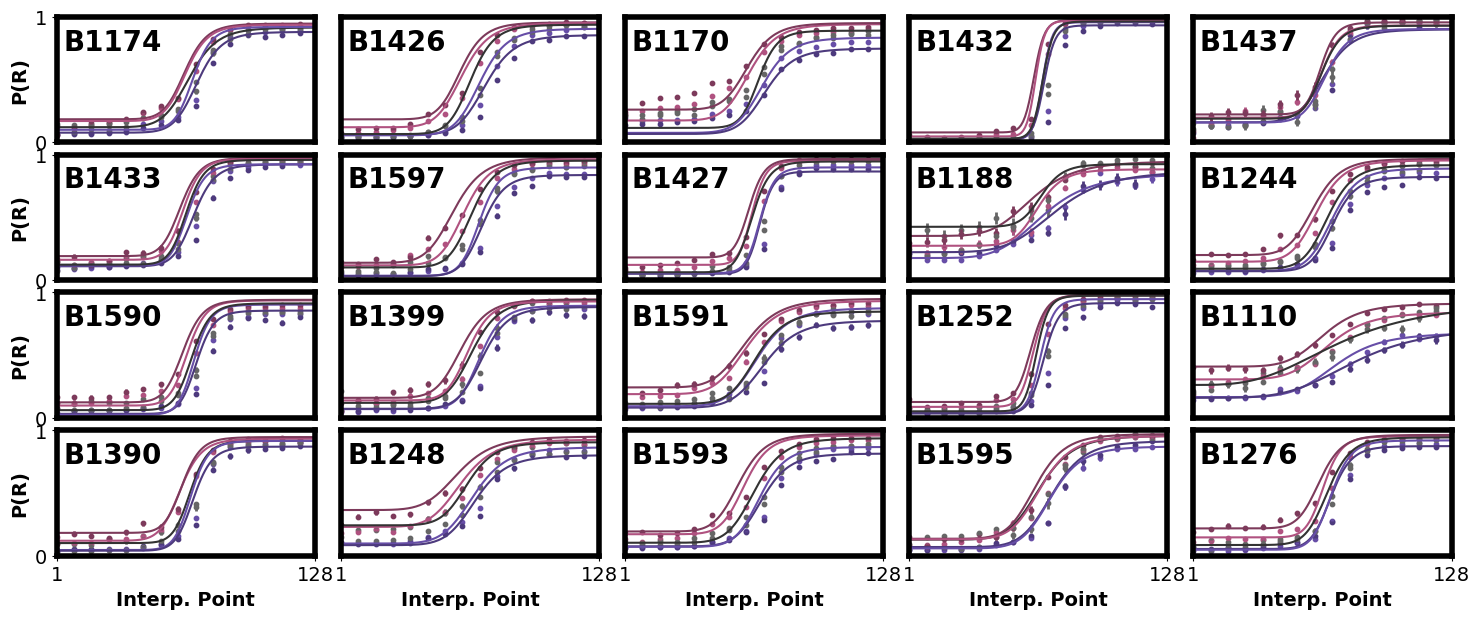

In [35]:
summary_groups = ["cue_id", "cue_direction", "cueing", "pos_bin"]
summary_data = {}
fig, axs = plt.subplots(ncols=5, nrows=4, figsize=(18, 7),gridspec_kw={
        "wspace": 0.1,
        "hspace": 0.1,
    })
for bi, bird in enumerate(tqdm(subjects)):
    summary_data[bird] = sum_data(behav_data[bird], groups=summary_groups)
    ax = axs.flatten()[bi]
    coli = bi // 4
    #if bi % 4 == 0:
    #    ax.set_ylabel('P(PR)', fontsize=22)
    plot_summary_data(
        bird,
        summary_data[bird][-10000:],
        bins=np.linspace(0,128, 16),
        ax=ax,
        lines=False,
        error=True,
        scatter=True,
        title=False,
        legend=False,
        error_size=2
    )
    ax.set_xticks([])
    ax.set_ylim([0, 1])
    ax.set_yticks([])
    [i.set_linewidth(4) for i in ax.spines.values()]
    
    if bi % 5 == 0:
        ax.set_ylabel(f"P(R)", fontsize=14, fontweight="bold")
        ax.set_yticks([0, 1])
        ax.set_yticklabels([0, 1], fontsize=14)
    else:
        ax.set_yticks([])
        ax.set_yticklabels([])

    if bi > 14:
        ax.set_xlabel("Interp. Point", fontsize=14, fontweight="bold")
        ax.set_xticks([0, 127])
        
        ax.set_xticklabels([1, 128], fontsize=14)
    else:
        ax.set_xticks([])
        ax.set_xticklabels([])

    bird_fit_df = fit_df[fit_df.bird == bird]
    for cue_id in bird_fit_df.cue.unique():
        if cue_id == "NC":
            continue
        cue_row = bird_fit_df[bird_fit_df.cue == cue_id].iloc[0]
        ax.plot(interp_range, cue_row.y_interp, label = cue_id, color = cdcp_colors["cue_pal"][cue_id])
    
    ax.text(
        0.025,
        0.8,
        bird,
        horizontalalignment="left",
        verticalalignment="center",
        fontweight="bold",
        fontsize=20,
        transform=ax.transAxes,
    )
    #break
    

if True:
    ensure_dir(FIGURE_DIR / 'behavior')
    if save_figs:
        save_fig(FIGURE_DIR / 'behavior' / 'psychometric_birds-small', save_pdf=True)
    plt.show()
